In [1]:
import sys
sys.path.append("../src")

import generate_general_networks as generate
import torch
import matplotlib.pyplot as plt
import json
import numpy as np
import tikzplotlib

In [2]:
# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_new.json")
results = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_1_new.json")
results_1 = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_alt_start.json")
results_alt_start = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_1_alt_start.json")
results_alt_start_1 = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_restart.json")
results_restart = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_restart_1.json")
results_restart_1 = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_restart_alt_start.json")
results_restart_alt_start = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_restart_1_alt_start.json")
results_restart_alt_start_1 = json.load(f)
f.close()

In [3]:
# Collecting network configuration
network_file = results['network_file']
f = open("../"+network_file)
network_config = json.load(f)
f.close()

T = network_config['T']
N = network_config['N']
controls = network_config['control_points']

In [4]:
# Collecting the start and final parameters
start = results['parameters'][0]
opt = results['parameters'][-1]
objective_vals = results['objectives']
parameters = results['parameters']

objective_vals = results['objectives']
objective_vals_1 = results_1['objectives']
objective_vals_alt_start = results_alt_start['objectives']
objective_vals_1_alt_start = results_alt_start_1['objectives']

objective_vals_restart = results_restart['objectives']
objective_vals_restart_1 = results_restart_1['objectives']
objective_vals_restart_alt_start = results_restart_alt_start['objectives']
objective_vals_restart_alt_start_1 = results_restart_alt_start_1['objectives']

In [5]:
# Create the networks
start_speeds = [[torch.tensor(start[i])] for i in range(8)]
# opt_speeds = [[torch.tensor(opt[i])] for i in range(8)]
opt_speeds = [[torch.tensor(50.0)] for i in range(8)]

start_cycle = [torch.tensor(start[8]), torch.tensor(start[9])]
opt_cycle = [torch.tensor(opt[8]), torch.tensor(opt[9])]
print(opt_cycle)

start_network = generate.medium_complex_network(T, N, start_speeds, controls, [start_cycle], track_grad=False)
opt_network = generate.medium_complex_network(T, N, opt_speeds, controls, [opt_cycle], track_grad=False)


[tensor(60.), tensor(10.)]


In [6]:
# Do the simulations
# densities, _, lengths, delays, n_stops = start_network.solve_cons_law_counting()
opt_densities, _, opt_lengths, opt_delays, opt_n_stops = opt_network.solve_cons_law_counting()

Bus bus_3 reached bus stop 0 at time 17.714290618896484, should wait for 29.506494522094727 seconds
Bus bus_1 reached bus stop 0 at time 24.914295196533203, should wait for 29.84310531616211 seconds
Bus bus_2 reached bus stop 0 at time 44.97145080566406, should wait for 29.58465003967285 seconds


In [7]:
delay = 0
for i in range(len(opt_delays)):
    for j in range(len(opt_delays[i])):
        delay += opt_delays[i][j]
print(delay/3) 

tensor(29.3590)


In [11]:
# Converting from dict to lists
times = list(lengths[0].keys())
distance = list(lengths[0].values())
distance2 = list(lengths[1].values())
distance3 = list(lengths[2].values())


opt_times = list(opt_lengths[0].keys())
opt_distance = list(opt_lengths[0].values())
opt_distance2 = list(opt_lengths[1].values())
opt_distance3 = list(opt_lengths[2].values())

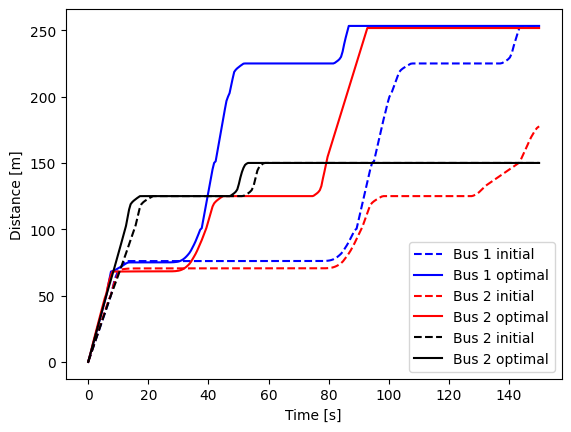

In [15]:
# Plotting distances

plt.plot(times, distance, '--b', label = "Bus 1 initial")
plt.plot(opt_times, opt_distance, 'b', label = "Bus 1 optimal")
plt.plot(times, distance2, '--r', label = "Bus 2 initial")
plt.plot(opt_times, opt_distance2, 'r', label = "Bus 2 optimal")
plt.plot(times, distance3, '--k', label = "Bus 3 initial")
plt.plot(opt_times, opt_distance3, 'k', label = "Bus 3 optimal")

plt.ylabel("Distance [m]")
plt.xlabel("Time [s]")
plt.legend()

tikzplotlib.save("../figurer/medium_complex_dist.tex")

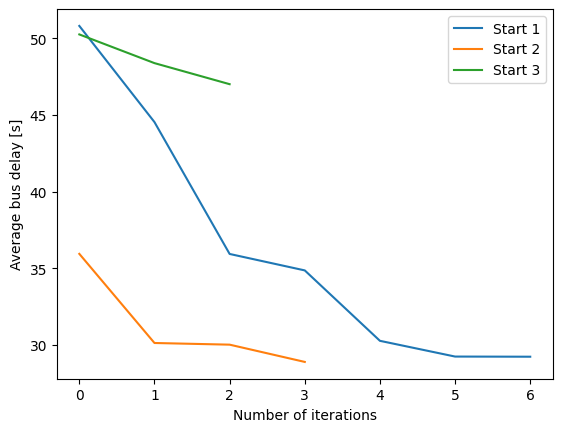

In [7]:
# plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1])
# plt.plot([i for i in range(len(objective_vals_1)-1)], objective_vals_1[:-1])
# plt.plot([i for i in range(len(objective_vals_2)-1)], objective_vals_2[:-1])
plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1], label="Start 1")
plt.plot([i for i in range(len(objective_vals_1)-1)], objective_vals_1[:-1], label="Start 2")
plt.plot([i for i in range(len(objective_vals_alt_start)-1)], objective_vals_alt_start[:-1], label="Start 3")


plt.xlabel("Number of iterations")
plt.ylabel("Average bus delay [s]")
plt.legend()
tikzplotlib.save("../figurer/medium_conv.tex")

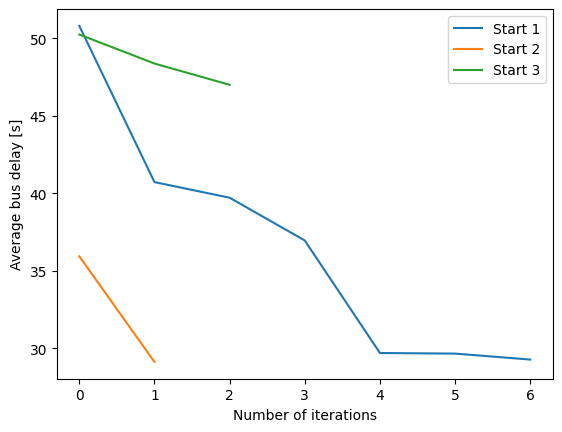

In [9]:
plt.plot([i for i in range(len(objective_vals_restart)-1)], objective_vals_restart[:-1], label="Start 1")
plt.plot([i for i in range(len(objective_vals_restart_1)-1)], objective_vals_restart_1[:-1], label="Start 2")
plt.plot([i for i in range(len(objective_vals_alt_start)-1)], objective_vals_alt_start[:-1], label="Start 3")


plt.xlabel("Number of iterations")
plt.ylabel("Average bus delay [s]")
plt.legend()
tikzplotlib.save("../figurer/medium_conv_restart.tex")

In [10]:
# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_through.json")
results_through = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_through_1.json")
results_through_1 = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_travel.json")
results_travel = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_travel_1_copy.json")
results_travel_1 = json.load(f)
f.close()

In [11]:
objectives_through = results_through['objectives']
objectives_through_1 = results_through_1['objectives']

objectives_travel = results_travel['objectives']
objectives_travel_1 = results_travel_1['objectives']

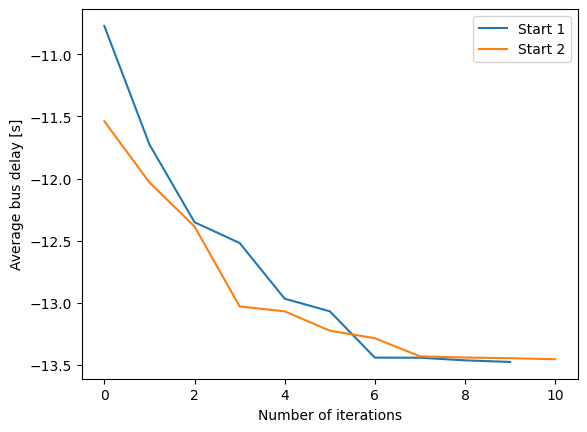

In [12]:
plt.plot([i for i in range(len(objectives_through)-1)], objectives_through[:-1], label="Start 1")
plt.plot([i for i in range(len(objectives_through_1)-1)], objectives_through_1[:-1], label="Start 2")


plt.xlabel("Number of iterations")
plt.ylabel("Average bus delay [s]")
plt.legend()
tikzplotlib.save("../figurer/medium_conv_through.tex")

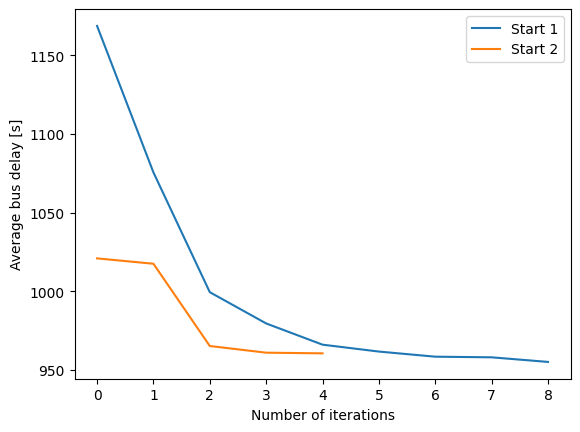

In [13]:
plt.plot([i for i in range(len(objectives_travel)-1)], objectives_travel[:-1], label="Start 1")
plt.plot([i for i in range(len(objectives_travel_1)-1)], objectives_travel_1[:-1], label="Start 2")


plt.xlabel("Number of iterations")
plt.ylabel("Average bus delay [s]")
plt.legend()
tikzplotlib.save("../figurer/medium_conv_travel.tex")